In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import math 
import random
from scipy.signal import resample

In [3]:
train_df = pd.read_csv('C:/Users/Administrator/Desktop/ECG-Heartbeat-Classification-master/train.csv',header=None)
test_df = pd.read_csv('C:/Users/Administrator/Desktop/ECG-Heartbeat-Classification-master/test.csv',header=None)

In [4]:
train_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,196,197,198,199,200,201,202,203,204,205
25106,0.991940,0.852010,0.664445,0.442897,0.290237,0.163212,0.082016,0.035722,0.019955,0.012006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6574,1.000000,0.844226,0.302712,0.000000,0.134638,0.207601,0.202285,0.226530,0.264249,0.217805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
53086,0.680027,0.615083,0.112866,0.000000,0.073740,0.103183,0.115277,0.103183,0.120086,0.115277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27402,0.000000,0.007803,0.014014,0.093892,0.214772,0.287086,0.386194,0.519884,0.629135,0.718382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
48136,0.951449,0.911567,0.862445,0.817373,0.744675,0.660060,0.534042,0.393031,0.281442,0.176478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
70691,1.000000,0.918300,0.647353,0.369757,0.303001,0.265734,0.199518,0.193860,0.182478,0.168123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8657,0.903562,0.779915,0.468972,0.186861,0.070301,0.167254,0.220544,0.178724,0.172181,0.186861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7323,1.000000,0.934682,0.610854,0.090022,0.000000,0.245022,0.321347,0.304993,0.300286,0.297927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25447,0.990801,0.943905,0.448274,0.003053,0.279748,0.439285,0.402759,0.388820,0.381800,0.388820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19469,0.902952,0.600963,0.254967,0.396143,0.412353,0.392062,0.392062,0.416378,0.392062,0.416378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
#Classes:['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
Classes = {
    0:'N', 
    1:'S', 
    2:'V', 
    3:'F'
}

Classes_index = {
    'N': 0, 
    'S': 1, 
    'V': 2, 
    'F': 3
}

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Columns: 206 entries, 0 to 205
dtypes: float64(205), int64(1)
memory usage: 125.7 MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 206 entries, 0 to 205
dtypes: float64(205), int64(1)
memory usage: 31.4 MB


In [8]:
feat_cols_name = [i for i in range(train_df.shape[1]-1)]

train_df.columns = feat_cols_name+["205"]
test_df.columns = feat_cols_name+["205"]

In [9]:
train_df["205"] = train_df["205"].astype(int)
test_df["205"] = test_df["205"].astype(int)

In [10]:
train_df["205"] = train_df["205"].map(Classes)
test_df["205"] = test_df["205"].map(Classes)

In [11]:
train_df.columns[train_df.isnull().sum() != 0]
test_df.columns[train_df.isnull().sum() != 0]

Index([], dtype='object')

In [12]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.877010,0.775314,0.516806,0.324935,0.302665,0.304426,0.292448,0.281265,0.269564,0.257771,...,0.008335,0.007725,0.007155,0.006883,0.006555,0.006123,0.005807,0.005413,0.005088,0.004876
std,0.257907,0.233671,0.242243,0.258771,0.228795,0.216831,0.219255,0.212565,0.199313,0.189491,...,0.061659,0.059410,0.057221,0.055424,0.054692,0.052747,0.051318,0.049180,0.047655,0.046506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.911773,0.694737,0.345135,0.096365,0.129789,0.134542,0.112041,0.100694,0.100481,0.105134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.984153,0.858695,0.547620,0.282150,0.237835,0.245884,0.226276,0.233672,0.234905,0.217126,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.932614,0.684555,0.518620,0.430908,0.442840,0.450276,0.432489,0.396406,0.369123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.984113,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


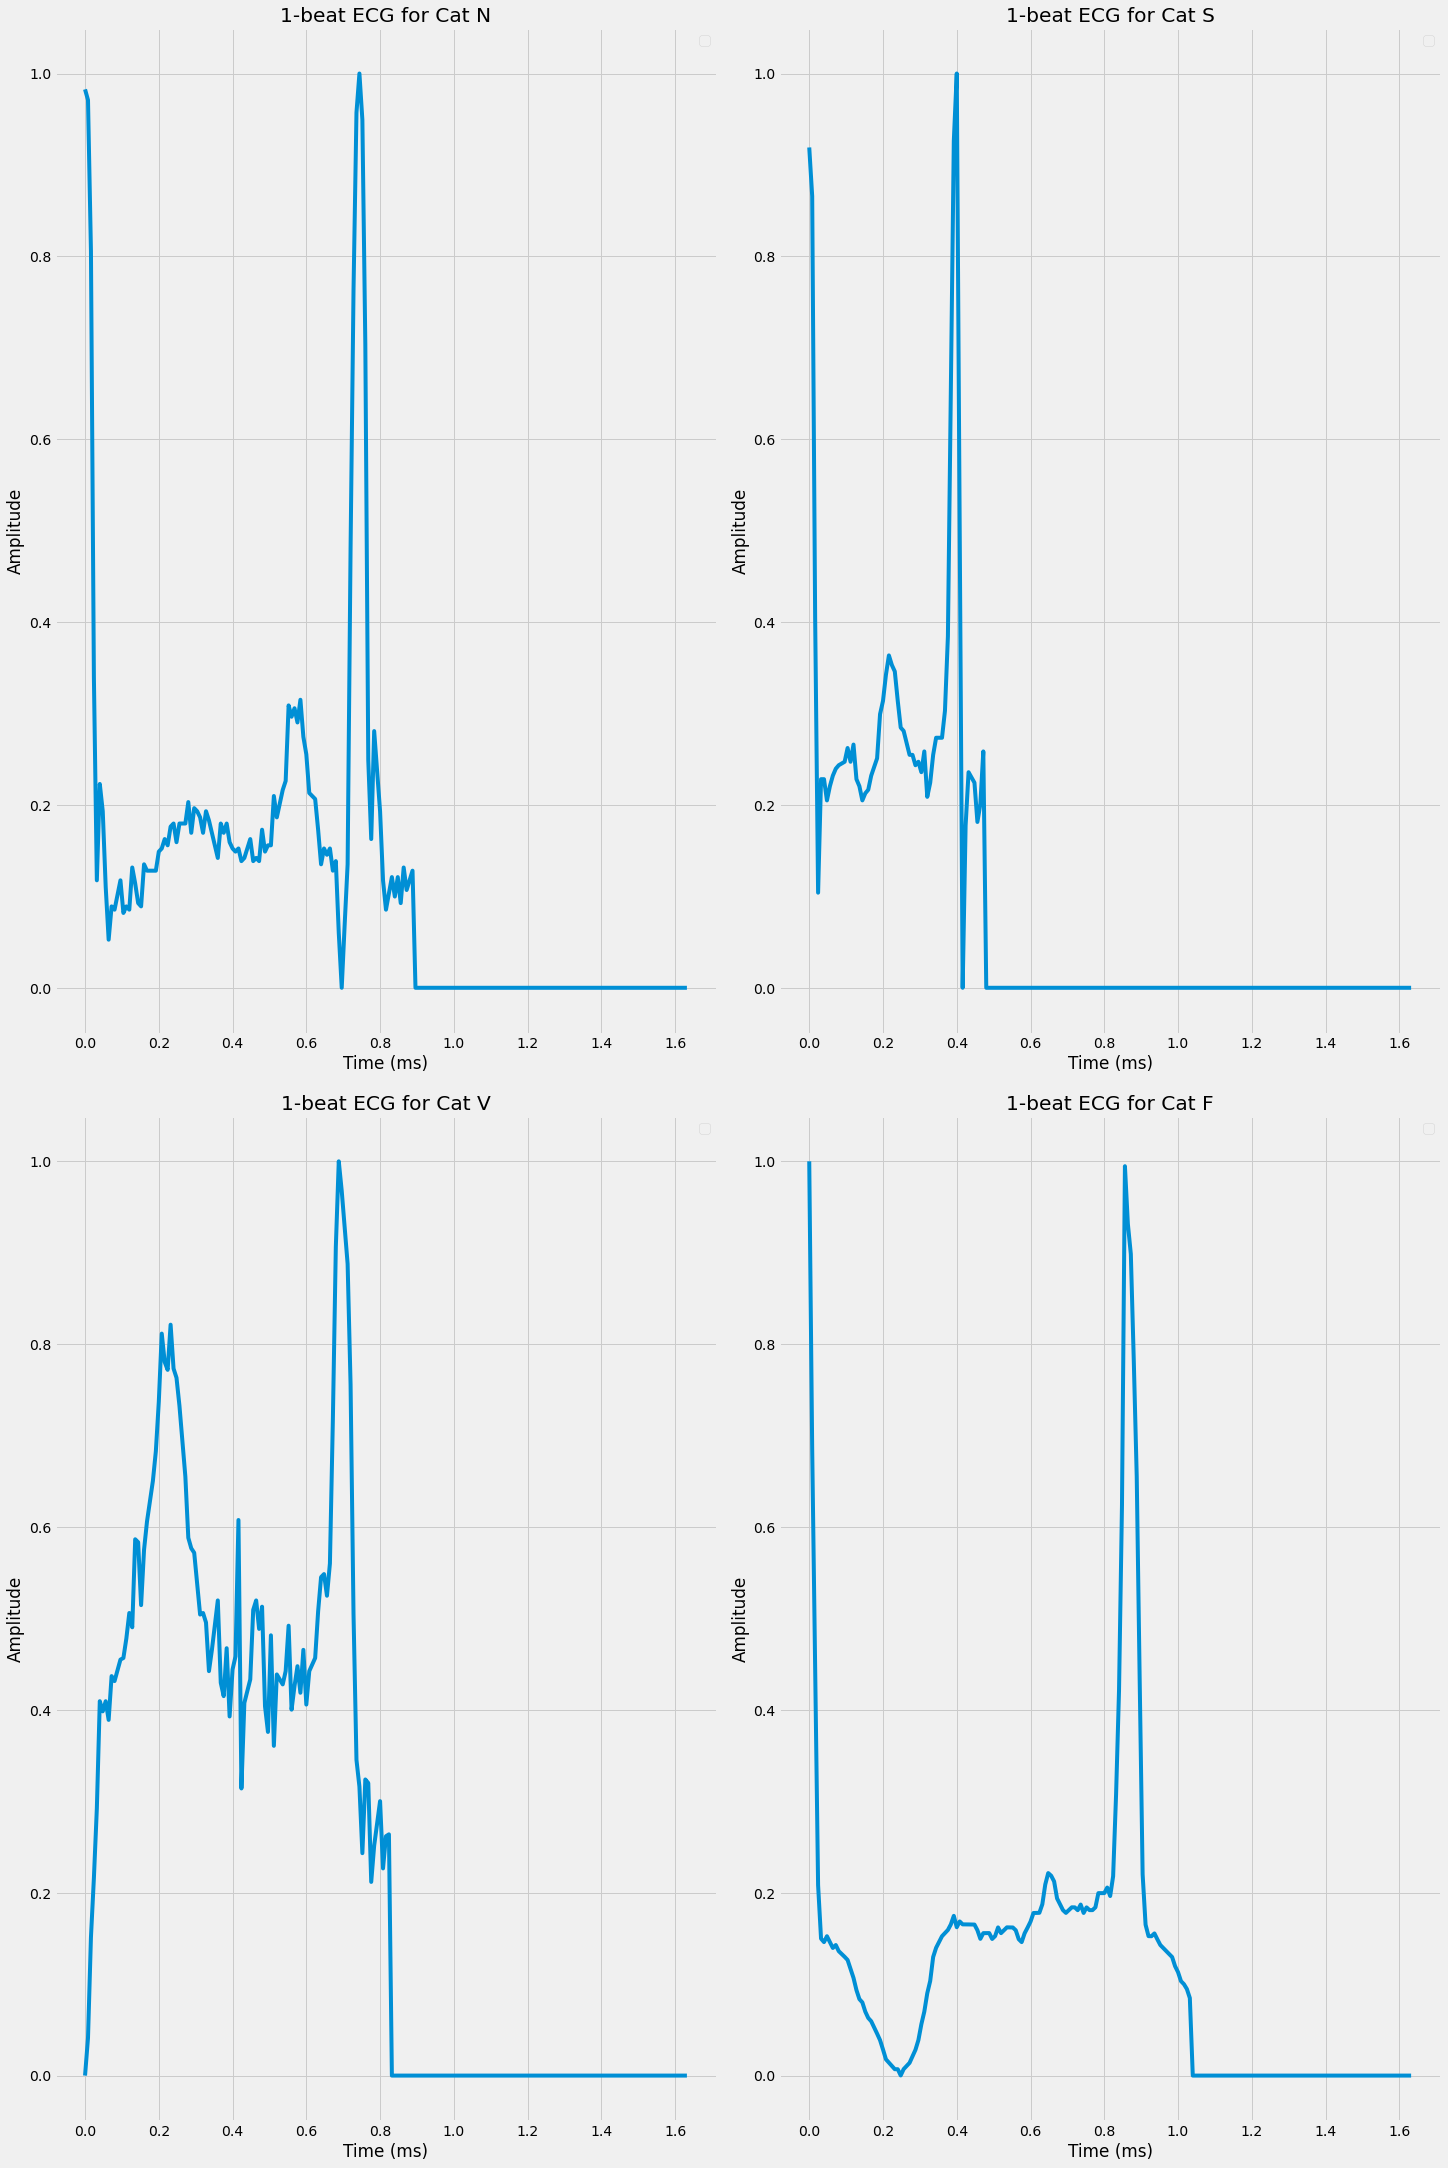

In [13]:
fig, axes= plt.subplots(math.ceil(len(Classes_index.keys())/2), 2, figsize=(20,30), constrained_layout=True)
X = np.arange(0, len(feat_cols_name))*8/1000

i = 0
for key, value in Classes_index.items():
    ax = axes[int(i/2), i%2]
    ax.plot(X, train_df[train_df["205"] == key][feat_cols_name].sample(1).values.reshape(-1,1))
    ax.legend()
    ax.set(title="1-beat ECG for Cat {}".format(key))
    ax.set(ylabel="Amplitude")
    ax.set(xlabel="Time (ms)")
    i+=1

In [14]:
def stretch(x):
    l = int(len(feat_cols_name) * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < len(feat_cols_name):
        y_ = np.zeros(shape=(len(feat_cols_name), ))
        y_[:l] = y
    else:
        y_ = y[:len(feat_cols_name)]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def gaussian_noise(signal):
    noise=np.random.normal(0,0.01, len(feat_cols_name))
    return (signal+noise)

def augment(x):
    result = np.zeros(shape= (4, len(feat_cols_name)))
    for i in range(3):
        if random.random() < 0.25:
            new_X = gaussian_noise(x)
        elif random.random() < 0.50:
            new_X = stretch(x)           
        elif random.random() < 0.75:
            new_X = amplify(x)
        else:
            new_X = gaussian_noise(x)
            new_X = stretch(new_X)
            new_X = amplify(new_X)
        result[i, :] = new_X
    return result

In [15]:
train_df["205"] = train_df["205"].map(Classes_index)
test_df["205"] = test_df["205"].map(Classes_index)

In [16]:
X_train = train_df[feat_cols_name].values
y_train = train_df["205"].values

X_test = test_df[feat_cols_name].values
y_test = test_df["205"].values

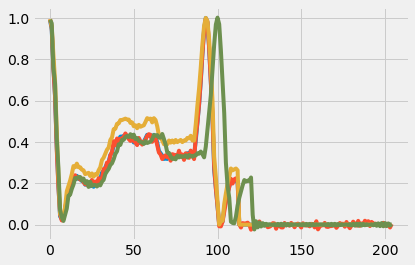

In [17]:
plt.plot(X_train[0])
plt.plot(gaussian_noise(X_train[0]))
plt.plot(amplify(X_train[0]))
plt.plot(stretch(X_train[0]))
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=2, stratify=y_train)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((72000, 205), (72000,), (8000, 205), (8000,))

In [19]:
tmp_X_train = X_train.copy()
tmp_y_train = y_train.copy()

X_train = []
y_train = []
for i in range(0, len(tmp_y_train)):
    augment_X = augment(tmp_X_train[i])
    augment_y = np.ones(shape=(augment_X.shape[0],), dtype=int)*tmp_y_train[i]

    X_train.extend(augment_X)
    y_train.extend(augment_y)
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
X_train.shape, y_train.shape

((288000, 205), (288000,))

In [21]:
X_train = X_train.reshape((-1, len(feat_cols_name), 1))
X_val = X_val.reshape((-1, len(feat_cols_name), 1))
X_test = X_test.reshape((-1, len(feat_cols_name), 1))

y_train = y_train.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

In [22]:
input_shape = X_train.shape[1:]
nb_classes = len(Classes_index.keys())
input_shape, nb_classes

((205, 1), 4)

In [23]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=nb_classes)
y_val = to_categorical(y_val, num_classes=nb_classes)
y_test = to_categorical(y_test, num_classes=nb_classes)

In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score as f1_score_rep
import seaborn as sn


def print_score(y_pred, y_real, label_encoder):
    print("Accuracy: ", accuracy_score(y_real, y_pred))
    print("Precision:: ", precision_score(y_real, y_pred, average="micro"))
    print("Recall:: ", recall_score(y_real, y_pred, average="micro"))
    print("F1_Score:: ", f1_score_rep(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (macro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="macro"))

    print()
    print("Macro precision_recall_fscore_support (micro) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="micro"))

    print()
    print("Macro precision_recall_fscore_support (weighted) average")
    print(precision_recall_fscore_support(y_real, y_pred, average="weighted"))
    
    print()
    print("Confusion Matrix")
    cm = confusion_matrix(y_real, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm, index = [i for i in label_encoder],
                  columns = [i for i in label_encoder])
    plt.figure(figsize = (10,10))
    sn.heatmap(df_cm, annot=True)

    print()
    print("Classification Report")
    print(classification_report(y_real, y_pred, target_names=label_encoder))

In [25]:
#!pip install livelossplot

In [26]:
from keras.layers import Conv1D, MaxPool1D, Concatenate, BatchNormalization, Activation, Input, Add, \
                         GlobalAveragePooling1D, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from livelossplot import PlotLossesKeras
from tensorflow.keras.metrics import Recall, Precision
import keras
import time

In [27]:
import keras.backend as K

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [28]:
class Classifier_INCEPTION:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=1):
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs

        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):

        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(3)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        return x

    def build_model(self, input_shape, nb_classes):
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):

            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', 
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall(), f1_score])

        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                      factor=0.5, 
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)
        
        file_path = os.path.join(self.weights_directory,"best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path, 
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)
        
        early_stopping = EarlyStopping(monitor="val_accuracy", 
                                       mode="max", 
                                       verbose=1, 
                                       patience=int(self.nb_epochs/10))
        plotlosses = PlotLossesKeras()
        self.callbacks = [reduce_lr, model_checkpoint, early_stopping, plotlosses]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):       
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train, 
                              batch_size=mini_batch_size, 
                              epochs=self.nb_epochs,
                              verbose=self.verbose, 
                              validation_data=(x_val, y_val), 
                              callbacks=self.callbacks)
        
        duration = time.time() - start_time
        keras.backend.clear_session()
        print("Model take {} S to train ".format(duration))
        return hist

In [29]:
weights_directory = "./"
inception = Classifier_INCEPTION(weights_directory, input_shape, nb_classes, 1, 
                                 batch_size=512, build=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 205, 1)]     0           []                               
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 205, 1)       0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 205, 32)      1280        ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 205, 32)      640         ['input_1[0][0]']                
                                                                                              

 conv1d_16 (Conv1D)             (None, 205, 32)      40960       ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_17 (Conv1D)             (None, 205, 32)      20480       ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_18 (Conv1D)             (None, 205, 32)      10240       ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_19 (Conv1D)             (None, 205, 32)      4096        ['max_pooling1d_3[0][0]']        
                                                                                                  
 concatenate_3 (Concatenate)    (None, 205, 128)     0           ['conv1d_16[0][0]',              
                                                                  'conv1d_17[0][0]',              
          

                                                                                                  
 concatenate_6 (Concatenate)    (None, 205, 128)     0           ['conv1d_32[0][0]',              
                                                                  'conv1d_33[0][0]',              
                                                                  'conv1d_34[0][0]',              
                                                                  'conv1d_35[0][0]']              
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 205, 128)    512         ['concatenate_6[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 activation_8 (Activation)      (None, 205, 128)     0           ['batch_normalization_8[0][0]']  
          

 ormalization)                                                                                    
                                                                                                  
 activation_12 (Activation)     (None, 205, 128)     0           ['batch_normalization_12[0][0]'] 
                                                                                                  
 global_average_pooling1d (Glob  (None, 128)         0           ['activation_12[0][0]']          
 alAveragePooling1D)                                                                              
                                                                                                  
 dense (Dense)                  (None, 4)            516         ['global_average_pooling1d[0][0]'
                                                                 ]                                
                                                                                                  
Total para

In [30]:
from tensorflow.keras.utils import plot_model

plot_model(inception.model, to_file="model_fig.jpg", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


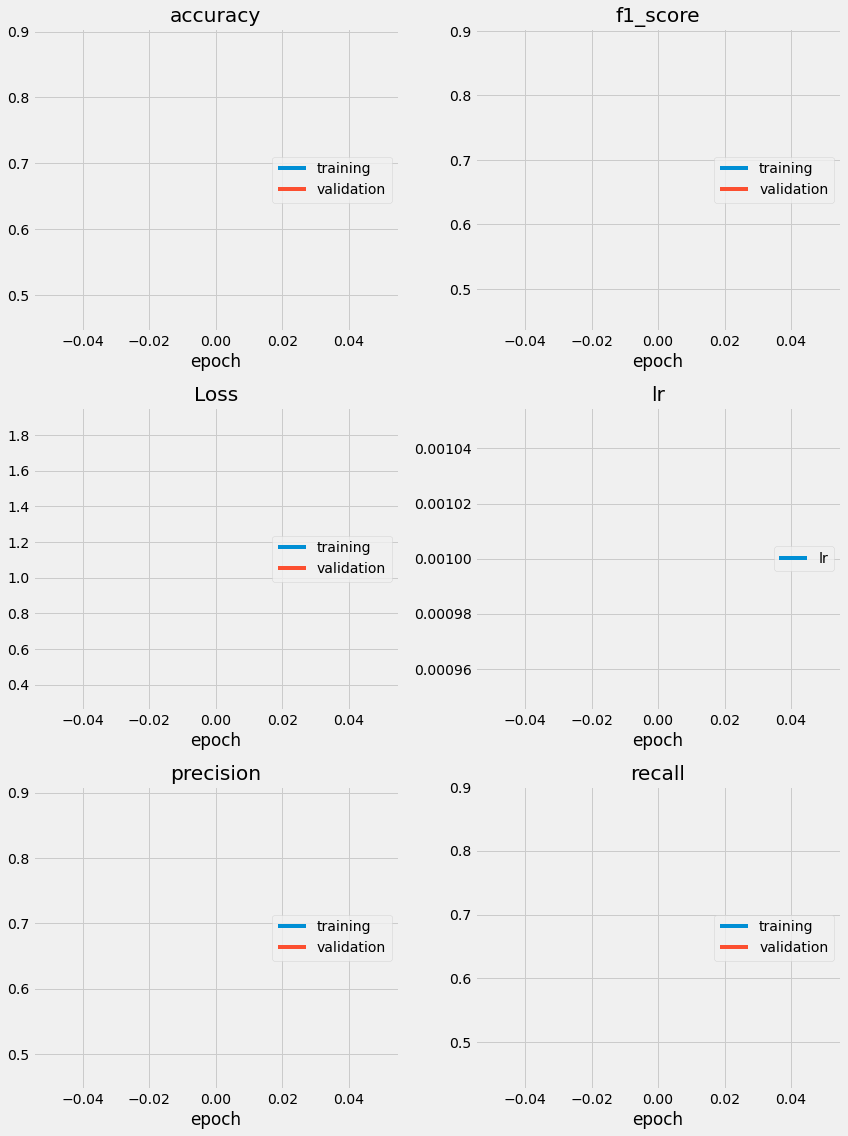

accuracy
	training         	 (min:    0.884, max:    0.884, cur:    0.884)
	validation       	 (min:    0.466, max:    0.466, cur:    0.466)
f1_score
	training         	 (min:    0.883, max:    0.883, cur:    0.883)
	validation       	 (min:    0.456, max:    0.456, cur:    0.456)
Loss
	training         	 (min:    0.333, max:    0.333, cur:    0.333)
	validation       	 (min:    1.880, max:    1.880, cur:    1.880)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)
precision
	training         	 (min:    0.889, max:    0.889, cur:    0.889)
	validation       	 (min:    0.467, max:    0.467, cur:    0.467)
recall
	training         	 (min:    0.880, max:    0.880, cur:    0.880)
	validation       	 (min:    0.447, max:    0.447, cur:    0.447)
563/563 [==============================] - 3781s 7s/step - loss: 0.3333 - accuracy: 0.8844 - precision: 0.8893 - recall: 0.8801 - f1_score: 0.8832 - val_loss: 1.8801 - val_accuracy: 0.4658 - val_precision: 0.4670 - val_recall: 0.44

In [31]:
history = inception.fit(X_train, y_train, X_val, y_val)

In [32]:
inception.model.load_weights("./best_weights.h5")

In [33]:
inception.model.evaluate(X_val, y_val)

250/250 [==============================] - 15s 60ms/step - loss: 1.8801 - accuracy: 0.4658 - precision: 0.4670 - recall: 0.4475 - f1_score: 0.4569


[1.8801195621490479,
 0.4657500088214874,
 0.4669971168041229,
 0.44749999046325684,
 0.4569268226623535]

In [34]:
inception.model.evaluate(X_test, y_test)

625/625 [==============================] - 37s 60ms/step - loss: 1.9404 - accuracy: 0.4572 - precision: 0.4599 - recall: 0.4394 - f1_score: 0.4493


[1.9403754472732544,
 0.45719999074935913,
 0.45993614196777344,
 0.43939998745918274,
 0.4493182599544525]

In [35]:
y_hat = inception.model.predict(X_test)

625/625 [==============================] - 38s 59ms/step


In [36]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def ROC_plot(y_true_ohe, y_hat_ohe, label_encoder, n_classes):    
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_ohe[:, i], y_hat_ohe[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
                                  
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_ohe.ravel(), y_hat_ohe.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.figure(figsize=(20,20))
    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(list(label_encoder.keys())[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass characteristic")
    plt.legend(loc="lower right")
    plt.show()

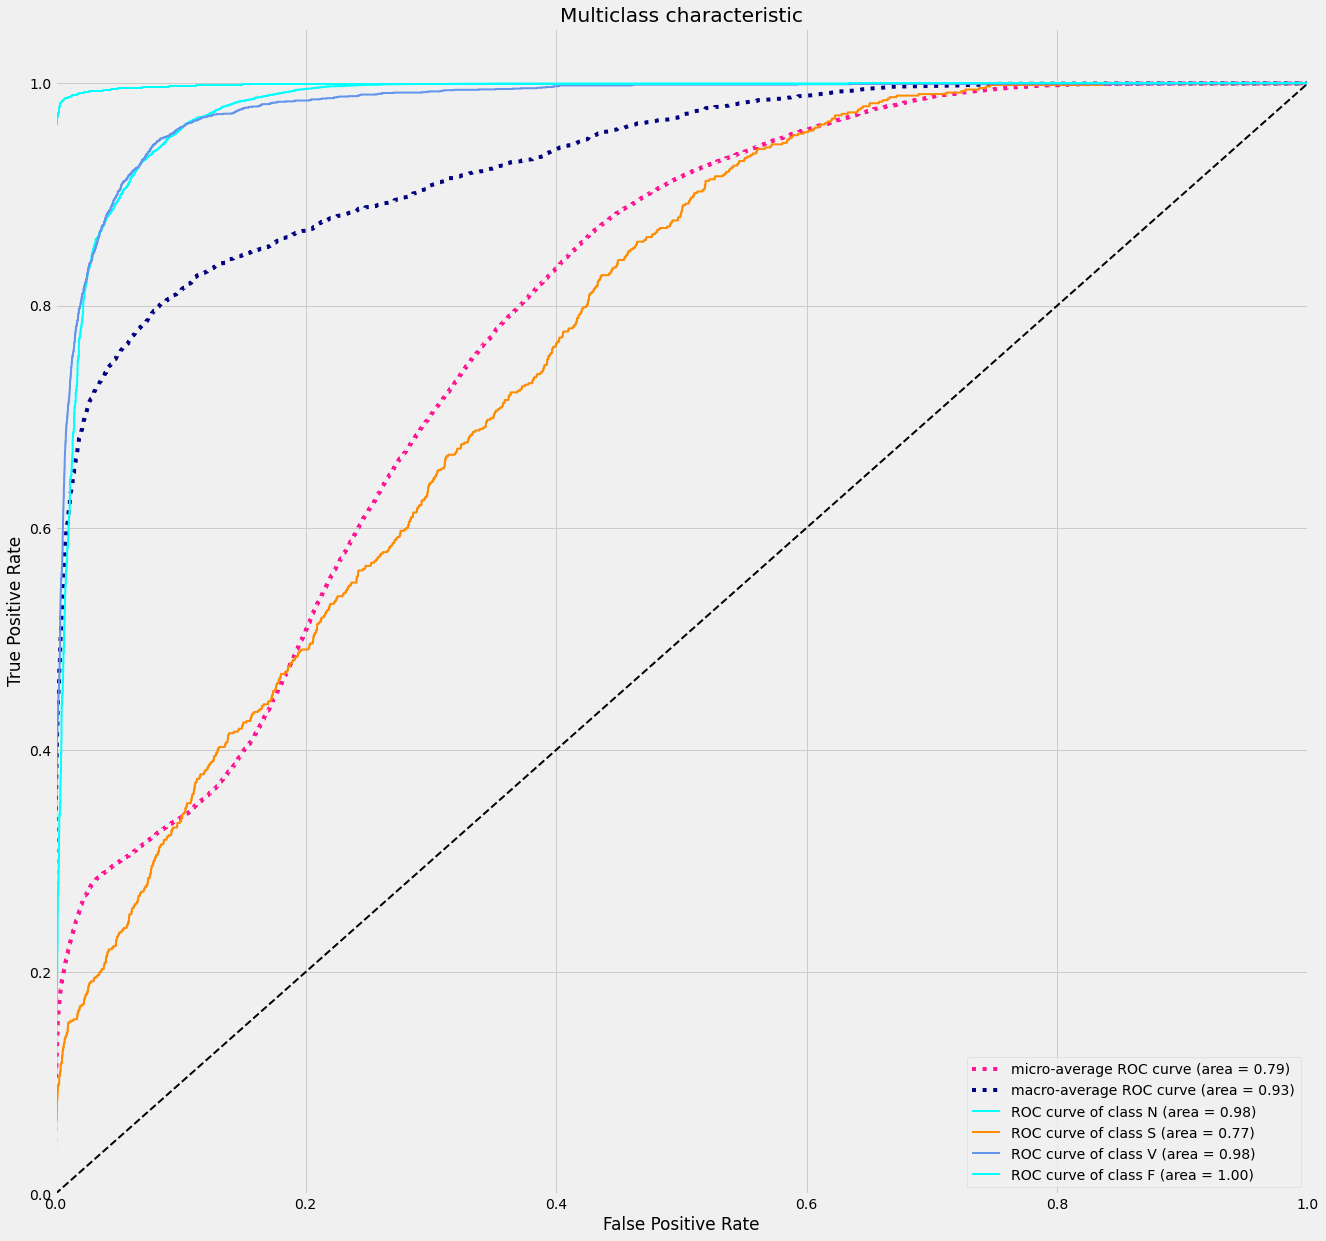

In [37]:
ROC_plot(y_test, y_hat, Classes_index, nb_classes)

Accuracy:  0.4572
Precision::  0.4572
Recall::  0.4572
F1_Score::  0.4572

Macro precision_recall_fscore_support (macro) average
(0.6240685450647908, 0.581570035582555, 0.4658123056174254, None)

Macro precision_recall_fscore_support (micro) average
(0.4572, 0.4572, 0.4572, None)

Macro precision_recall_fscore_support (weighted) average
(0.857339829314378, 0.4572, 0.45716328079095364, None)

Confusion Matrix

Classification Report
              precision    recall  f1-score   support

           N       1.00      0.22      0.35     12934
           S       0.32      0.13      0.19       730
           V       0.21      1.00      0.35      2793
           F       0.97      0.98      0.98      3543

    accuracy                           0.46     20000
   macro avg       0.62      0.58      0.47     20000
weighted avg       0.86      0.46      0.46     20000



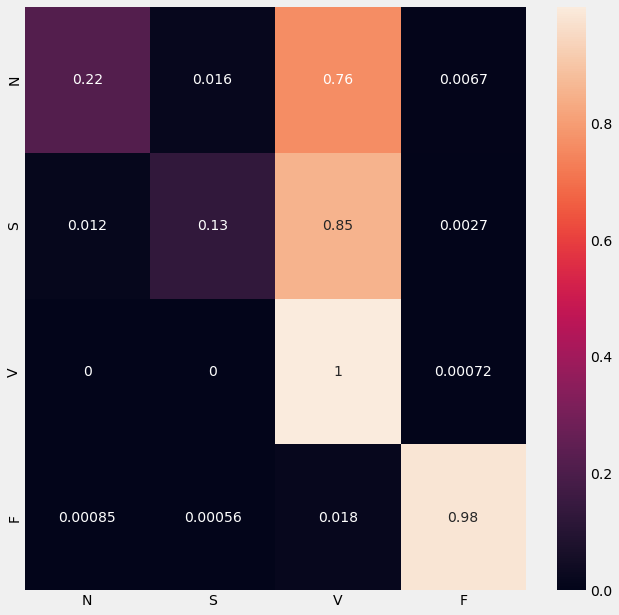

In [38]:
y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_test, axis=1)

print_score(y_hat, y_true, Classes_index)